In [1]:
import sys
sys.path.append('../../../src')
from helpers import *
%matplotlib notebook

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [4]:
res = pd.read_csv('../../Raw analysis/RING PH/res_no_pb.csv')
df = pd.read_csv('../../Raw analysis/RING PH/df_no_pb.csv')
df['Total'] = df['Total'] / 1000
df_wt = df[df.Line == 'nwg313']
df_c56s = df[df.Line == 'nwg373']
df_no_rnai = df[df.Condition == 'wt']
df_ph = df[df.Line == 'od58']

### Concentration profiles

In [5]:
def fold(array):
    return (array[:50][::-1] + array[50:]) / 2

def plot_profile(ax, df, c, cond, leg=None):
    if cond is not None:
        frames = df[df['Condition'] == cond]['EmbryoID']
    else: 
        frames = df['EmbryoID']
    mean_profile, std_profile = np.mean(profs[frames], axis=0), np.std(profs[frames], axis=0)
    ax.plot(mean_profile, c=c, label=leg + ' (n=%s)' % len(frames))
#     [ax.plot(p, c=c, alpha=0.2) for p in profs[frames]]
    ax.fill_between(np.arange(len(mean_profile)), mean_profile - std_profile, mean_profile + std_profile, alpha=0.2, 
                    color=c, linewidth=0)
    
profs = res.groupby('EmbryoID').apply(lambda x: x['Membrane signal'].to_numpy() / x['Cytoplasmic signal'].to_numpy())
# profs = res.groupby('Frame').apply(lambda x: x['Membrane signal'].to_numpy())
profs = np.array([fold(x) for x in profs])

<IPython.core.display.Javascript object>


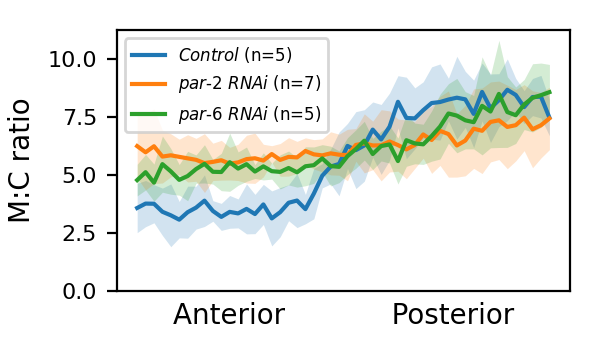

In [6]:
fig, ax = plt.subplots()
plot_profile(ax, df_wt, cond='wt', c='tab:blue', leg=r'$Control$')
plot_profile(ax, df_wt, cond='par2', c='tab:orange', leg=r'$par$' + '-' + r'$2\ RNAi$')
plot_profile(ax, df_wt, cond='par6', c='tab:green', leg=r'$par$' + '-' + r'$6\ RNAi$')
ax.set_ylim(bottom=0)
ax.set_xlabel('Anterior            Posterior')
ax.set_ylabel('M:C ratio')
ax.set_xticks([])
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize=6)
fig.set_size_inches(3, 1.8)
fig.tight_layout()
fig.savefig('Figs/ratio_profile_rnai.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


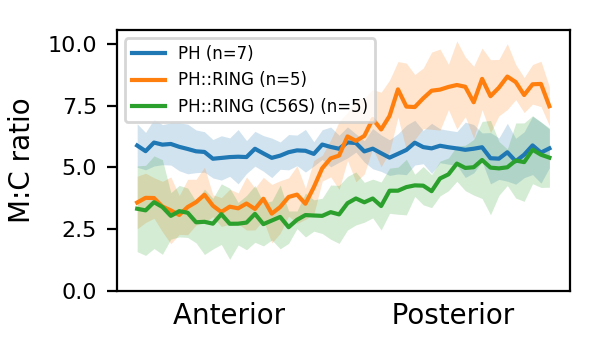

In [7]:
fig, ax = plt.subplots()
plot_profile(ax, df_ph, c='tab:blue', cond=None, leg='PH')
plot_profile(ax, df_wt, c='tab:orange', cond='wt', leg='PH::RING')
plot_profile(ax, df_c56s, c='tab:green', cond='wt',  leg='PH::RING (C56S)')
ax.set_ylim(bottom=0)
ax.set_xlabel('Anterior            Posterior')
ax.set_ylabel('M:C ratio')
ax.set_xticks([])
# ax.set_ylim(0, 3.5)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize=6)
fig.set_size_inches(3, 1.8)
fig.tight_layout()
fig.savefig('Figs/ratio_profile_wt_vs_c56s.png', dpi=600, transparent=True)

### Example images

<IPython.core.display.Javascript object>


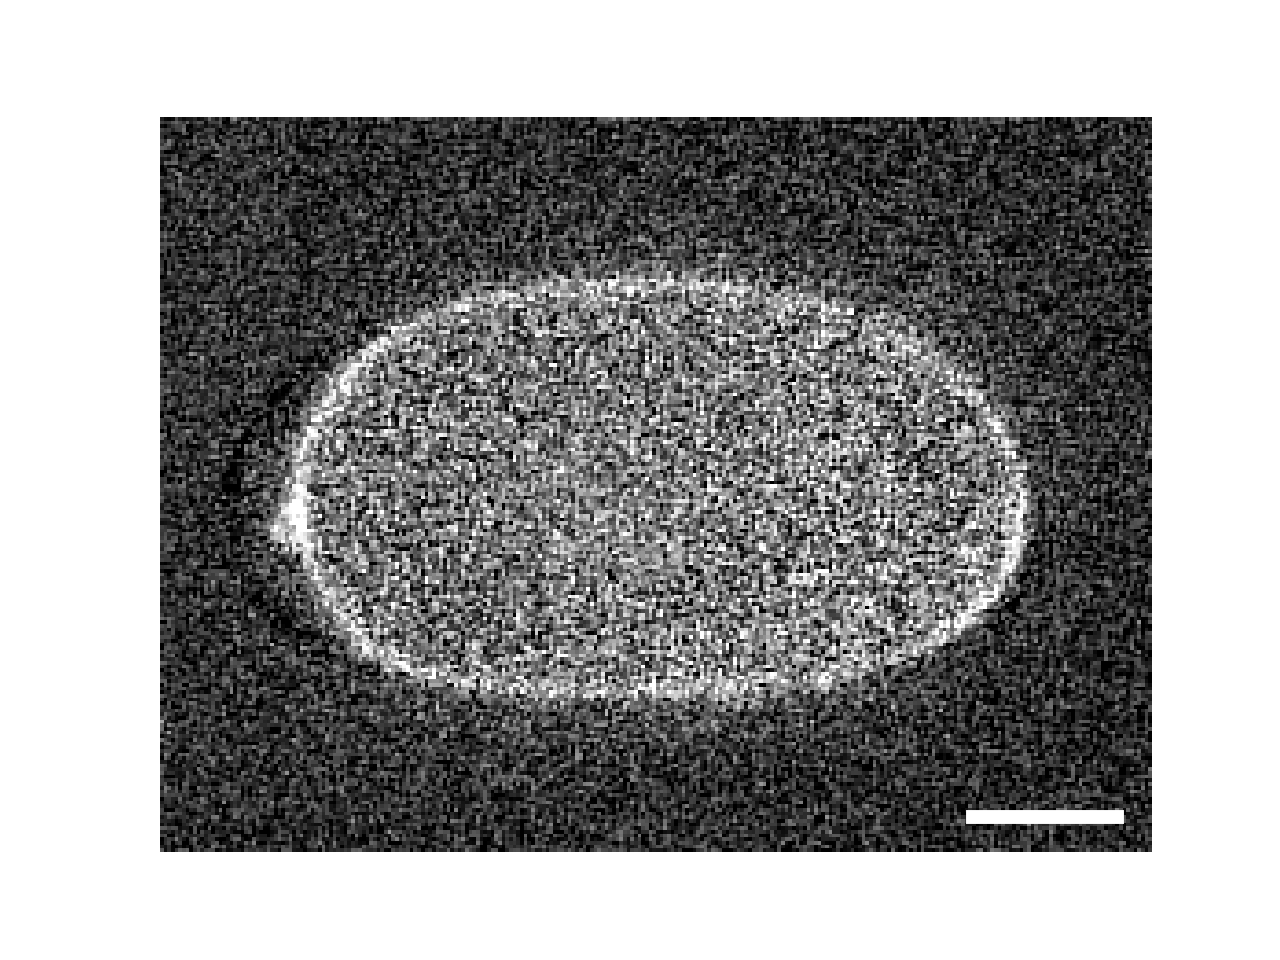

<IPython.core.display.Javascript object>


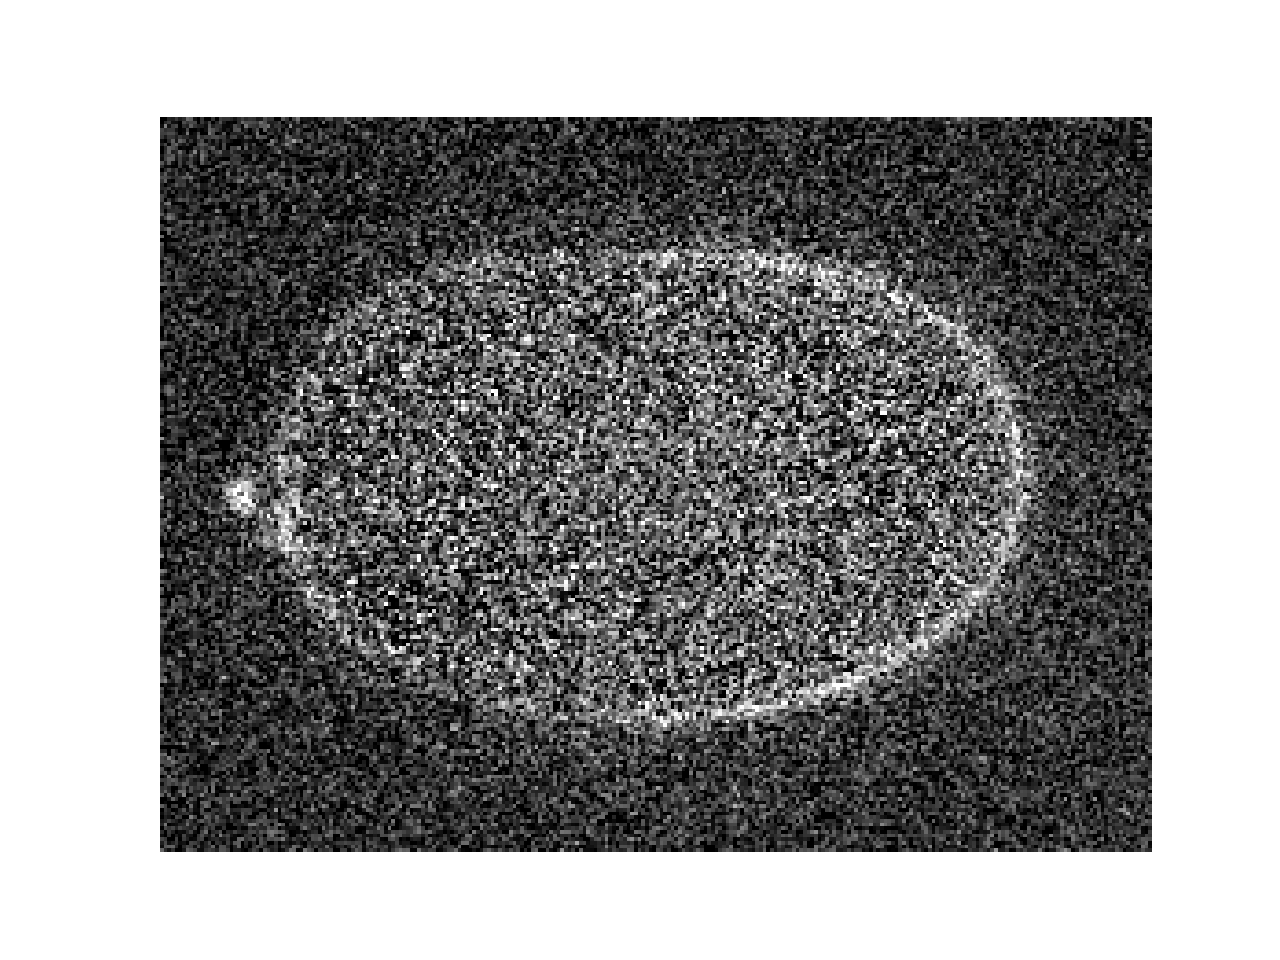

<IPython.core.display.Javascript object>


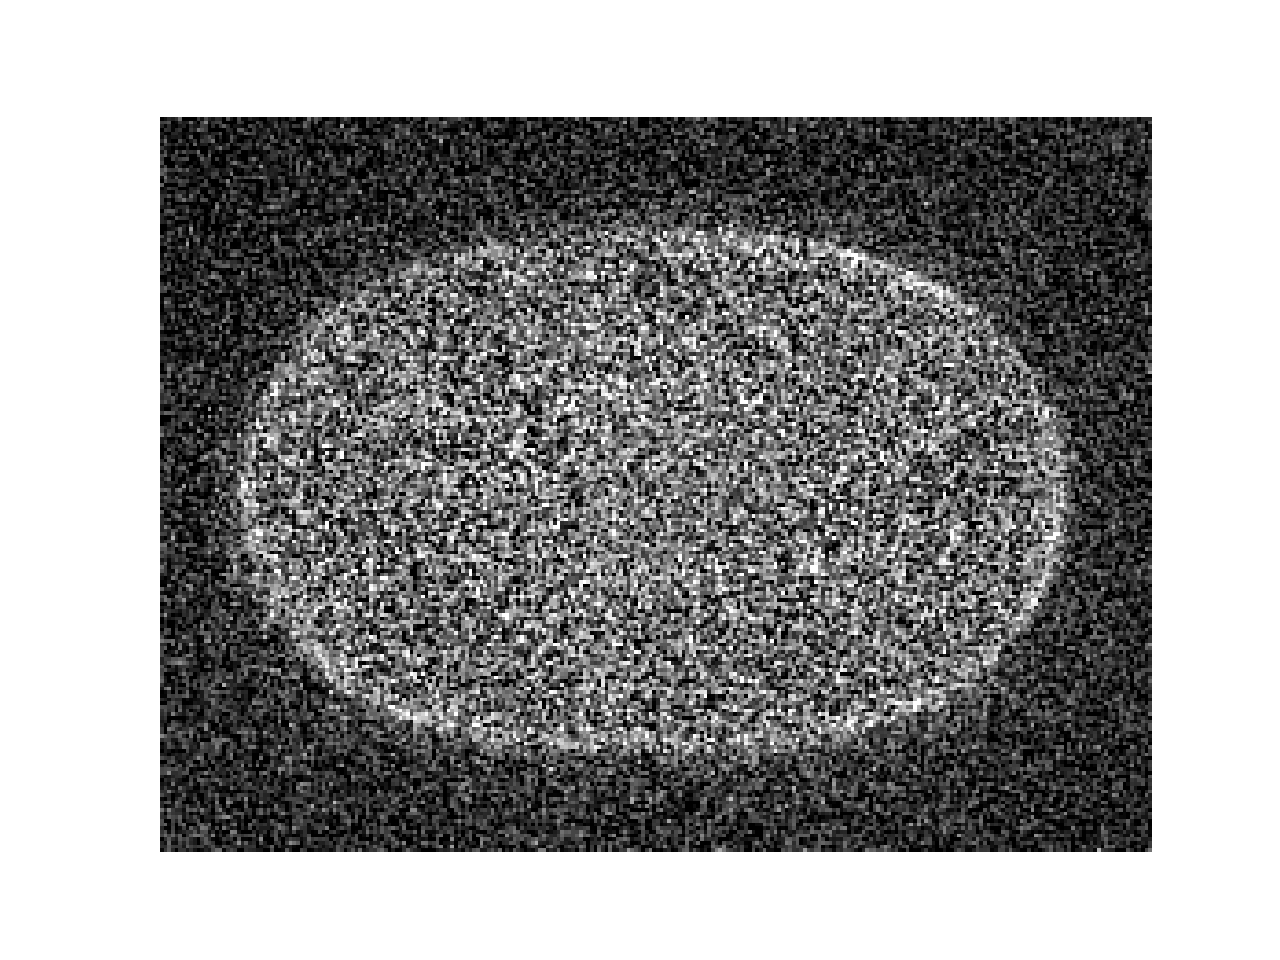

<IPython.core.display.Javascript object>


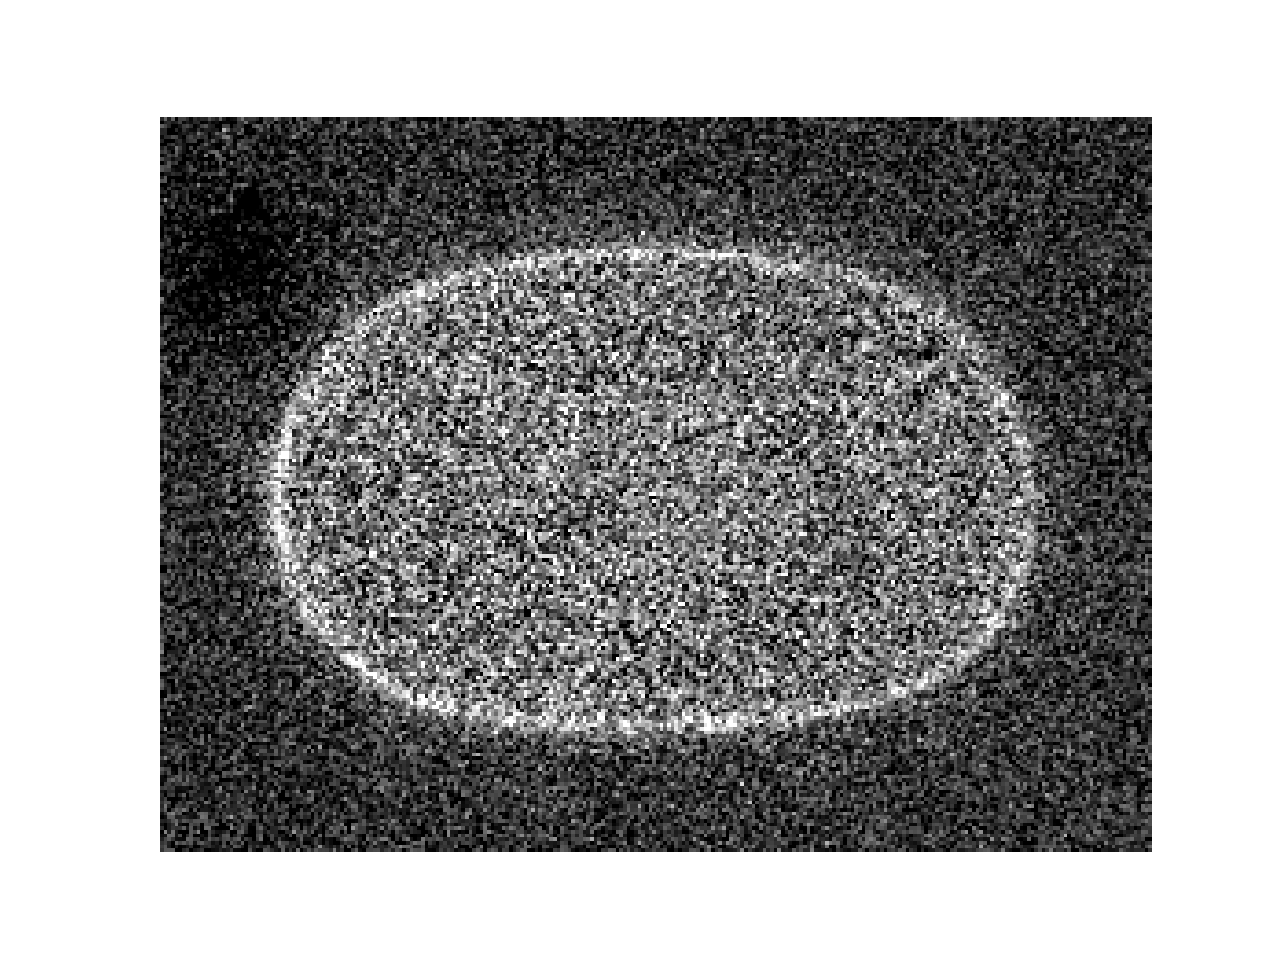

<IPython.core.display.Javascript object>


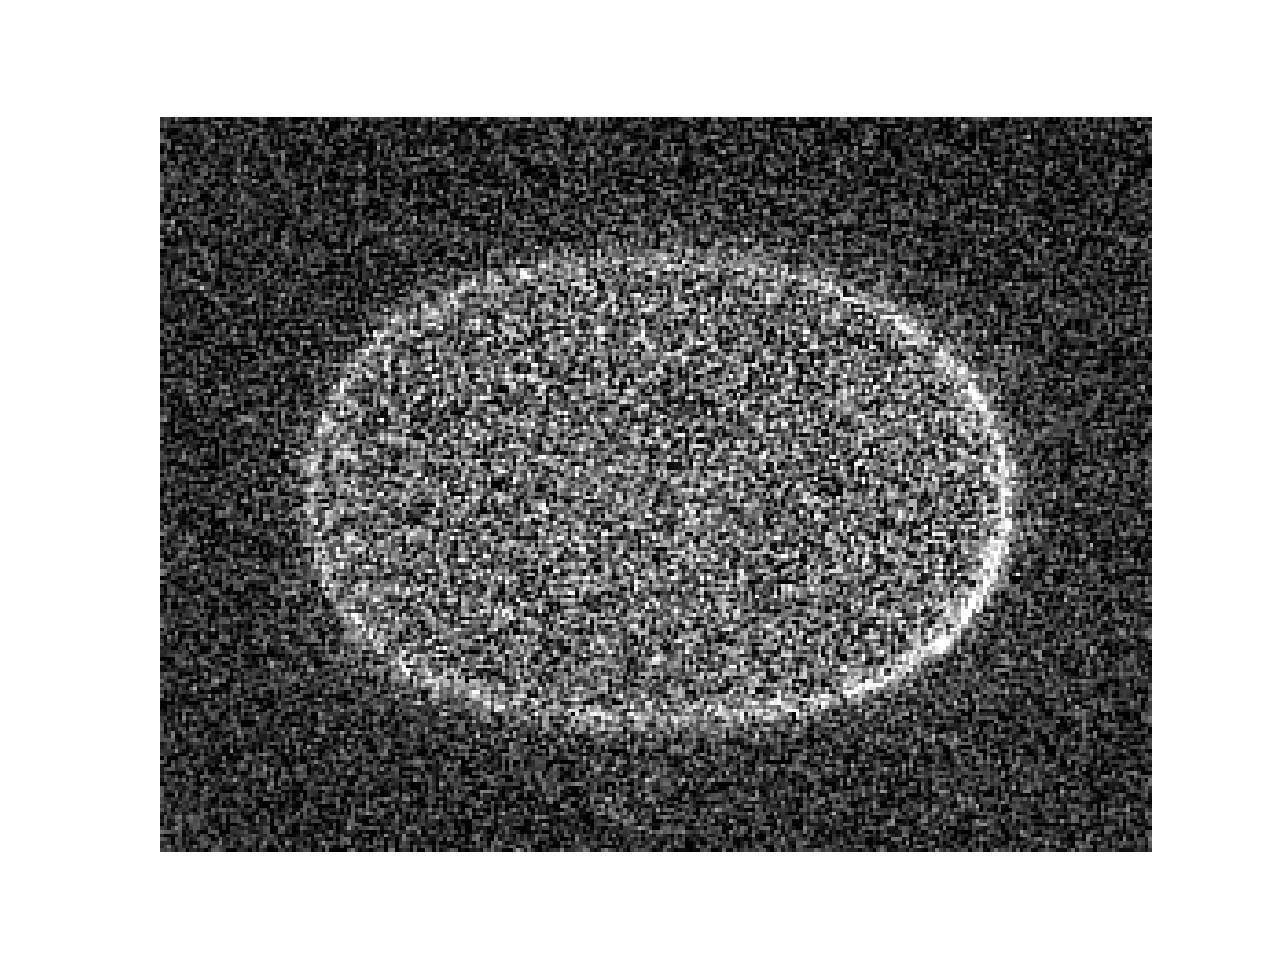

In [9]:
def func(path, save_path, scale_bar=False):
    fig, ax = plt.subplots()
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 270, 200, 3)
    ax.imshow(rotated, vmin=-200, vmax=2000, cmap='gray')
    ax.axis('off')
    
    if scale_bar:
        px = 0.255 # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot([rotated.shape[1]-10-bar_pixels, rotated.shape[1]-10], [y, y], color='w', linewidth=5)
    
    fig.savefig(save_path, dpi=600, transparent=True)
    
func(df_ph.Path.iloc[3], 'Figs/img_ph.png', scale_bar=True)
func(df_no_rnai[df_no_rnai.Line == 'nwg313'].Path.iloc[1], 'Figs/img_ph_ring.png')
func(df_no_rnai[df_no_rnai.Line == 'nwg373'].Path.iloc[0], 'Figs/img_ph_ring_c56s.png')
func(df_wt[df_wt.Condition == 'par2'].Path.iloc[2], 'Figs/img_ph_ring_par2.png')
func(df_wt[df_wt.Condition == 'par6'].Path.iloc[2], 'Figs/img_ph_ring_par6.png')